# 3 Method

## 3.1 The Noise Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### パラメータ一覧
<p>以下のパラメータは仮の値を入れております。</p>

In [2]:
alpha = 0.5    # 量子効率(quantum efficiency factor)
gain = 10      # アナログゲイン(analog gain)
sigma_d = 5    # ダークノイズの分散
sigma_r = 5    # 読み出し及び量子化ノイズの分散

<p>各素子に入射する予想光子数 U_exp(論文中のu*) は、仮の値として下図"U_exp image"のようなグラデーションの2次元配列を100枚与えました。</p>
<p>下図"U_exp profile"には1行目の値をプロットして値の変化を可視化しています。</p>

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]


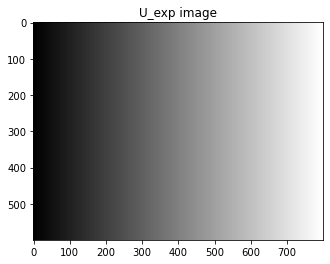

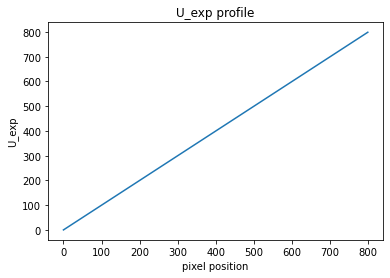

In [3]:
imgsize = (100, 600, 800)   # 画像枚数,縦サイズ,横サイズ
U_exp = np.tile(np.arange(0,imgsize[2]),(imgsize[0],imgsize[1],1))    # 各素子に入射する予想光子数(論文中のu*)

print(U_exp[0])
plt.title('U_exp image')
plt.imshow(U_exp[0], 'gray')
plt.show()
plt.title('U_exp profile')
plt.plot(U_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_exp')
plt.show()

### 式(1)の実装
<p>x* = gαu*</p>
<p>ノイズが含まれないため、上図"U_exp image","U_exp profile"と同様の分布になっています。<p>

[[   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 ...
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]]


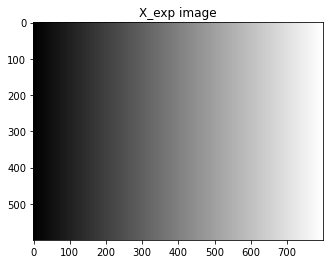

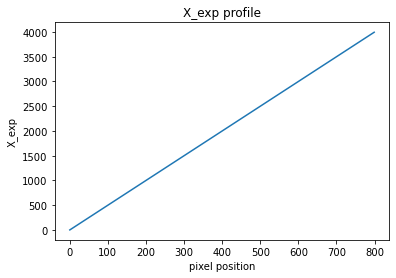

In [4]:
X_exp = gain * alpha * U_exp    # 論文中のx*

print(X_exp[0])
plt.title('X_exp image')
plt.imshow(X_exp[0], 'gray')
plt.show()
plt.title('X_exp profile')
plt.plot(X_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_exp')
plt.show()

### 式(3)の実装
<p>u ~ P(u*)</p>
<p>"U_act profile"から、u*が大きくなるにつれ、uのばらつきも大きくなることがわかります。<p>

[[  0   1   2 ... 818 801 797]
 [  0   2   3 ... 765 837 831]
 [  0   0   1 ... 804 810 812]
 ...
 [  0   1   1 ... 792 769 852]
 [  0   1   3 ... 813 779 776]
 [  0   0   1 ... 811 790 817]]


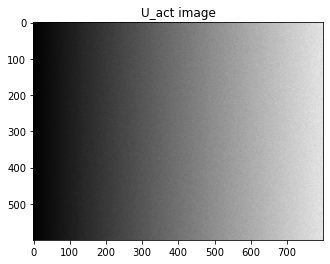

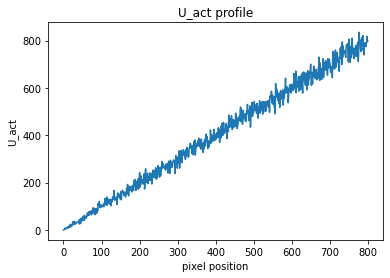

In [5]:
U_act = np.random.poisson(U_exp)    # 実際の光子の吸収量(論文中のu)

print(U_act[0])
plt.title('U_act image')
plt.imshow(U_act[0], 'gray')
plt.show()
plt.title('U_act profile')
plt.plot(U_act[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_act')
plt.show()

### 式(5)の実装
<p>x = kP(x*/k) + N(0,σ2)</p>

In [6]:
# 置換
k = gain * alpha
sigma2 = gain**2 * sigma_d**2 + sigma_r**2
print(f'k: {k}, sigma2: {sigma2}')

k: 5.0, sigma2: 2525


#### 式(5) ポアソンノイズの項
<p>kP(x*/k)</p>

[[   0.    5.    0. ... 3985. 4350. 3915.]
 [   0.    5.   10. ... 3760. 3800. 4005.]
 [   0.   10.   15. ... 3650. 4300. 4140.]
 ...
 [   0.   10.    0. ... 3820. 3810. 3880.]
 [   0.    5.    5. ... 4105. 4085. 4080.]
 [   0.    5.   10. ... 4110. 4010. 4300.]]


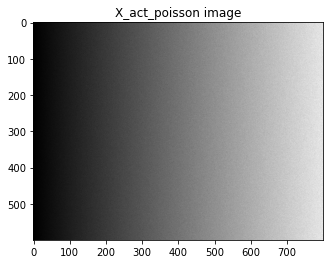

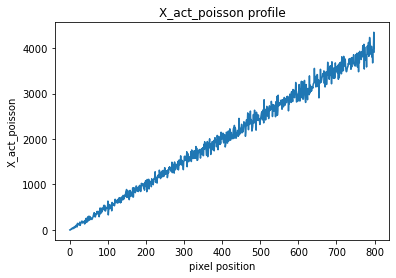

In [7]:
X_act_poisson = k * np.random.poisson(X_exp / k)    # 式(5) ポアソンノイズの項

print(X_act_poisson[0])
plt.title('X_act_poisson image')
plt.imshow(X_act_poisson[0], 'gray')
plt.show()
plt.title('X_act_poisson profile')
plt.plot(X_act_poisson[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_poisson')
plt.show()

#### 式(5) ガウシアンノイズの項
<p>N(0,σ2)</p>

[[  31.59757697   37.81506262   48.57499969 ...   18.49864118
    66.73852359   52.42590191]
 [  76.3699031    37.39562465   23.55275917 ...  -38.57534318
   -12.08866583  -47.49489638]
 [  30.25571828 -149.50843155  -85.66987293 ...   36.00397379
   -51.61248646   46.42730769]
 ...
 [ -15.19547128  -26.34026641   15.25053937 ...   48.73726742
    93.32681496  -16.20635656]
 [  26.57899144  -45.81421747  -42.3534377  ...  -15.38552958
   -13.84219968  -34.92602847]
 [  -8.33486521  -20.02765975  -47.44584758 ...   88.59468459
  -171.74760288   -7.00851658]]


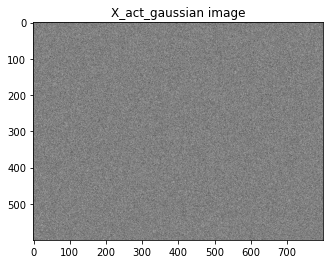

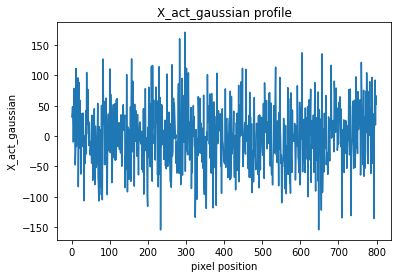

In [8]:
X_act_gaussian = np.random.normal(0, np.sqrt(sigma2), imgsize)    # 式(5) ガウシアンノイズの項

print(X_act_gaussian[0])
plt.title('X_act_gaussian image')
plt.imshow(X_act_gaussian[0], 'gray')
plt.show()
plt.title('X_act_gaussian profile')
plt.plot(X_act_gaussian[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_gaussian')
plt.show()

#### 式(5)
<p>x = kP(x*/k) + N(0,σ2)</p>

[[  31.59757697   42.81506262   48.57499969 ... 4003.49864118
  4416.73852359 3967.42590191]
 [  76.3699031    42.39562465   33.55275917 ... 3721.42465682
  3787.91133417 3957.50510362]
 [  30.25571828 -139.50843155  -70.66987293 ... 3686.00397379
  4248.38751354 4186.42730769]
 ...
 [ -15.19547128  -16.34026641   15.25053937 ... 3868.73726742
  3903.32681496 3863.79364344]
 [  26.57899144  -40.81421747  -37.3534377  ... 4089.61447042
  4071.15780032 4045.07397153]
 [  -8.33486521  -15.02765975  -37.44584758 ... 4198.59468459
  3838.25239712 4292.99148342]]


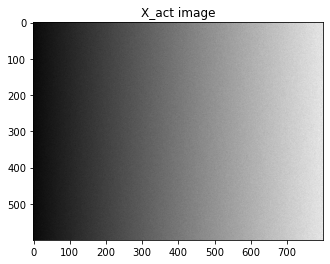

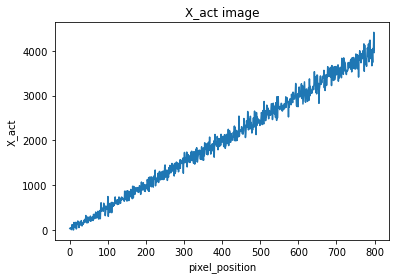

In [9]:
X_act = X_act_poisson + X_act_gaussian

print(X_act[0])
plt.title('X_act image')
plt.imshow(X_act[0], 'gray')
plt.show()
plt.title('X_act image')
plt.plot(X_act[0,0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act')
plt.show()

## 3.2 Parameter Estimation

<p>"3.1 Noise model"が正しく実装されているかを確認する。</p>

#### 平均を求める
<p>100枚の画像を平均した画像を下図"X_act_mean image"に示す。</p>

[[-2.88074872e+00  6.99580685e+00  6.97927609e+00 ...  3.99916510e+03
   3.99045382e+03  4.01507025e+03]
 [ 4.46213170e+00  1.24837736e+01  1.02735679e+01 ...  3.96171527e+03
   3.95434042e+03  3.98509008e+03]
 [ 1.66662195e+00  5.89865525e+00  1.31584598e+01 ...  3.97369314e+03
   4.01279722e+03  4.00336854e+03]
 ...
 [-6.71957125e+00 -4.47018275e+00  6.24350059e+00 ...  3.98357252e+03
   3.99924187e+03  3.98706469e+03]
 [ 6.62535309e+00  2.47276585e-01  1.34572758e+01 ...  4.00306413e+03
   3.99730560e+03  3.99905050e+03]
 [ 5.16486933e+00  1.89785732e+00  1.03677199e+01 ...  3.97791919e+03
   3.99777968e+03  3.98706995e+03]]


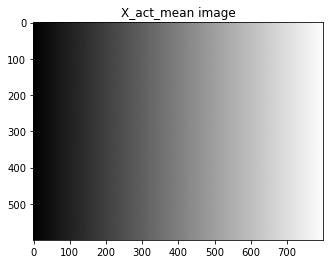

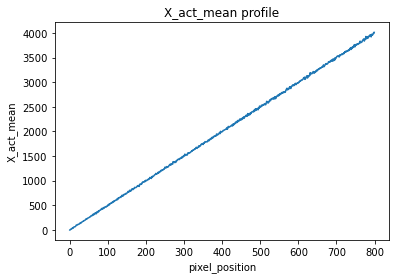

In [10]:
X_act_mean = np.mean(X_act, axis=0)

print(X_act_mean)
plt.title('X_act_mean image')
plt.imshow(X_act_mean, 'gray')
plt.show()
plt.title('X_act_mean profile')
plt.plot(X_act_mean[0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act_mean')
plt.show()

#### 分散を求める

<p>100枚の画像について、同じ画素位置の値の分散を求める。</p>
<p>平均と分散をプロットすると"X_act_var profile"のようになる。</p>

[[ 2973.31806548  2609.07669385  2330.86302182 ... 16943.60360429
  26446.8842082  20012.96932875]
 [ 3148.71425272  2287.33765645  2360.05975686 ... 26484.85242114
  22345.32879767 23633.40875092]
 [ 2336.82428009  2652.63395146  2308.72934832 ... 21069.69962592
  29702.55269669 26235.97915608]
 ...
 [ 2617.74406695  2104.46283241  2507.71121001 ... 17250.78546005
  21425.17245125 19440.36654508]
 [ 2693.32743893  2321.79578214  3012.50257642 ... 21261.15519446
  23926.50578715 26027.39369404]
 [ 2705.8225534   2392.29738806  2164.60273605 ... 17953.74300643
  24037.47585351 24616.739162  ]]


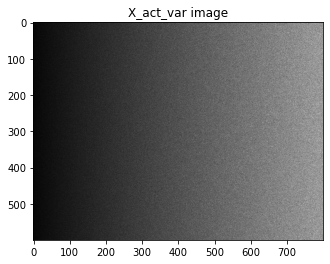

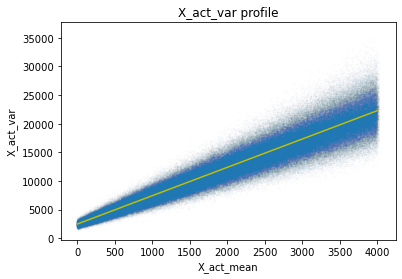

In [11]:
X_act_var = np.var(X_act, axis=(0))
print(X_act_var)
plt.title('X_act_var image')
plt.imshow(X_act_var, 'gray')
plt.show()
plt.title('X_act_var profile')
plt.scatter(X_act_mean.flatten(),X_act_var.flatten(),s=1,alpha=0.01)
config = np.polyfit(X_act_mean.flatten(),X_act_var.flatten(),1)
x = np.array([0,4000])
y = np.poly1d(config)(x)
plt.plot(x, y,'y')
plt.xlabel('X_act_mean')
plt.ylabel('X_act_var')
plt.show()

#### "k"と"sigma2"を求める
<p>1次近似を行い、"k"と"sigma2"を求めて真値と比較すると近い値になっていることがわかる。</p>
<p>よって"3.1 Noise Model"は正しく実装できていることが確認できた。</p>

In [12]:
print(f'k: {k}, sigma2: {sigma2}')
print(f'k_pred: {config[0]}, sigma2_pred: {config[1]}')

k: 5.0, sigma2: 2525
k_pred: 4.948427485187349, sigma2_pred: 2502.9834286404666


### 実際の画像で試してみる
<p>使用した画像元<a href="https://github.com/cchen156/Learning-to-See-in-the-Dark" target="_blank" rel="nofollow noopener">"Learning to See in the Dark"</a><p>

In [13]:
import cv2
import rawpy

In [14]:
def noise_model(input_array, k, sigma2):
    output = k * np.random.poisson(input_array / k) + np.random.normal(0, np.sqrt(sigma2), input_array.shape)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [15]:
path = './Learning-to-See-in-the-Dark/10106_00_30s.arw'
raw = rawpy.imread(path)
raw_post = raw.postprocess(use_camera_wb=True, half_size=True, no_auto_bright=True, output_bps=8)

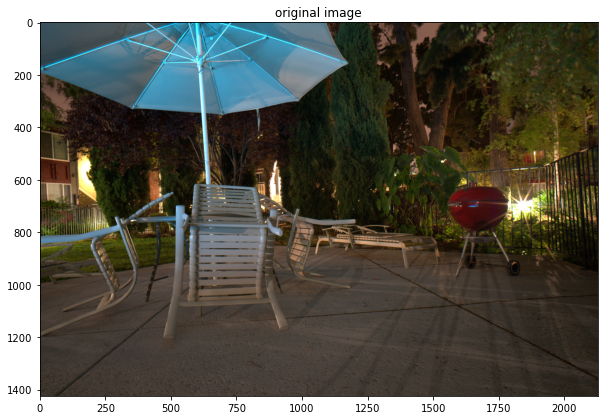

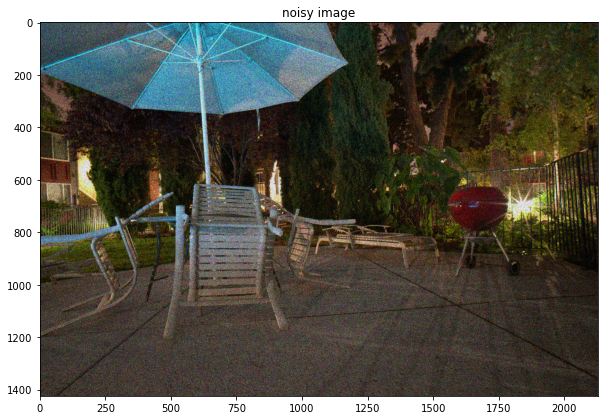

In [16]:
k = 30         # config
sigma2 = 30    # config

# オリジナル
plt.figure(figsize=(10,15))
plt.title('original image')
plt.imshow(raw_post)
plt.show()

# ノイズ付加
noisy_image = noise_model(raw_post, k, sigma2)
plt.figure(figsize=(10,15))
plt.title('noisy image')
plt.imshow(noisy_image)
plt.show()